# **DATA ANALYSIS OF SONGS STREAMED IN 2024**

##### I’ve gathered a detailed music dataset with over 4,600 rows and 29 columns, covering track performance across platforms like Spotify, YouTube, and TikTok. My goal is to explore trends like which platforms get the most streams or views, and how things like playlist reach and airplay spins impact a track's popularity. Through this analysis, I’ll answer key questions and provide visual insights into the music industry’s landscape.

#### *  *Importing libraries and load dataset*

In [1]:
import pandas as pd
import chardet
import matplotlib.pyplot as plt

with open('Songs.csv', 'rb') as f:
    result = chardet.detect(f.read())

df = pd.read_csv('Songs.csv', encoding=result['encoding'])
df


,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,QM8DG1703420,"4,585",19.4,"305,049,963","65,770","5,103,054",...,NaN,2.0,"14,217",NaN,"20,104,066","13,184","50,633,006","656,337",NaN,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,INT101800122,"4,575",19.4,"52,282,360","4,602","1,449,767",...,NaN,1.0,927,NaN,NaN,NaN,NaN,"193,590",NaN,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,USUG12000043,"4,571",19.4,"189,972,685","72,066","6,704,802",...,NaN,1.0,74,6.0,"84,426,740","28,999",NaN,"1,135,998",NaN,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,INY091600067,"4,591",19.4,"145,467,020","14,037","7,387,064",...,NaN,NaN,NaN,7.0,"6,817,840",NaN,NaN,"448,292",NaN,0


#### * *Droping duplicate rows and unwanted columns*

In [2]:
df=df.drop_duplicates()
df=df.dropna(subset=['Artist'])
df = df.drop("TIDAL Popularity", axis='columns')


#### * *Cleaning the data*

In [3]:
for i in df:
    if df[i].isnull().sum()>1:
        columns_to_convert=i
        df[columns_to_convert] = df[columns_to_convert].replace(',', '', regex=True).astype(float)
        df[columns_to_convert] = df[columns_to_convert].round()
        df[columns_to_convert]=df[columns_to_convert].interpolate()
        

### * *Checking if there is any null values*

In [4]:
missing=df.isnull().sum()
print(missing)

Track                         0
Album Name                    0
Artist                        0
Release Date                  0
ISRC                          0
All Time Rank                 0
Track Score                   0
Spotify Streams               0
Spotify Playlist Count        0
Spotify Playlist Reach        0
Spotify Popularity            0
YouTube Views                 0
YouTube Likes                 0
TikTok Posts                  0
TikTok Likes                  0
TikTok Views                  0
YouTube Playlist Reach        0
Apple Music Playlist Count    0
AirPlay Spins                 0
SiriusXM Spins                0
Deezer Playlist Count         0
Deezer Playlist Reach         0
Amazon Playlist Count         0
Pandora Streams               0
Pandora Track Stations        0
Soundcloud Streams            0
Shazam Counts                 0
Explicit Track                0
dtype: int64


In [5]:
df.describe()

,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track
count,4593.000000,4.593000e+03,4593.000000,4.593000e+03,4593.000000,4.593000e+03,4.593000e+03,4.593000e+03,4.593000e+03,4.593000e+03,...,4.593000e+03,4593.000000,4593.000000,4.593000e+03,4593.000000,4.593000e+03,4.593000e+03,4.593000e+03,4.593000e+03,4593.000000
mean,41.840235,4.485543e+08,59495.599173,2.337553e+07,63.505552,3.998786e+08,2.924044e+06,9.104540e+05,1.107102e+08,1.143628e+09,...,5.546903e+04,228.288591,31.466253,1.261362e+06,24.451557,8.438412e+07,8.706991e+04,1.371473e+07,2.552042e+06,0.359460
std,38.562767,5.357268e+08,70893.354033,2.960982e+07,15.482269,6.860276e+08,4.529690e+06,2.239542e+06,5.221905e+08,5.548200e+09,...,1.264725e+05,459.268548,51.456766,3.427210e+06,24.581981,1.568344e+08,2.438173e+05,2.520558e+07,5.883551e+06,0.479894
min,19.400000,1.071000e+03,1.000000,1.000000e+00,1.000000,9.130000e+02,2.500000e+01,1.000000e+00,3.000000e+00,1.900000e+01,...,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,2.000000e+00,1.000000e+00,1.800000e+01,1.000000e+00,0.000000
25%,23.300000,7.234836e+07,6868.000000,4.843707e+06,60.666667,4.391226e+07,4.336920e+05,4.765500e+04,7.184433e+06,7.019639e+07,...,6.050000e+02,31.500000,5.666667,6.377650e+04,8.000000,1.687958e+06,1.800000e+03,1.286983e+06,2.621760e+05,0.000000
50%,29.900000,2.426610e+08,32703.000000,1.331889e+07,67.000000,1.533990e+08,1.307290e+06,2.039040e+05,2.925269e+07,2.866227e+08,...,6.764000e+03,90.750000,15.666667,2.492530e+05,17.000000,1.687102e+07,1.011400e+04,4.485036e+06,9.433650e+05,0.000000
75%,44.400000,6.319555e+08,86239.000000,2.975313e+07,72.000000,4.647686e+08,3.588736e+06,8.104290e+05,9.600176e+07,9.477818e+08,...,4.961500e+04,240.000000,36.000000,8.941390e+05,32.000000,8.789994e+07,5.569600e+04,1.490442e+07,2.807300e+06,1.000000
max,725.400000,4.281469e+09,590392.000000,2.623434e+08,96.000000,1.632276e+10,6.231118e+07,4.290000e+07,2.347422e+10,2.332323e+11,...,1.777811e+06,7098.000000,632.000000,4.819785e+07,210.000000,1.463624e+09,3.780513e+06,3.198359e+08,2.197945e+08,1.000000


### 1.What are the top 5 albums based on Spotify streams?

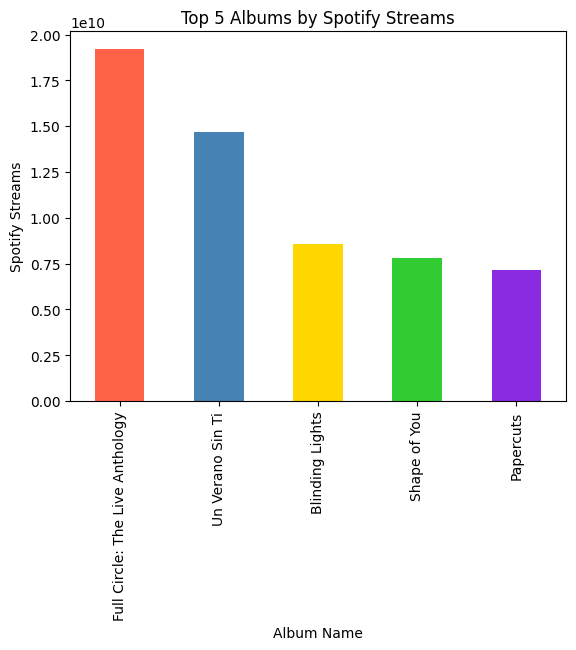

In [6]:
top_albums = df.groupby('Album Name')['Spotify Streams'].sum().nlargest(5)
colors = ['#FF6347', '#4682B4', '#FFD700', '#32CD32', '#8A2BE2']
top_albums.plot(kind='bar',color=colors)
plt.title('Top 5 Albums by Spotify Streams')
plt.ylabel('Spotify Streams')
plt.show()


## 2.What are the top 10 artists based on Spotify streams?

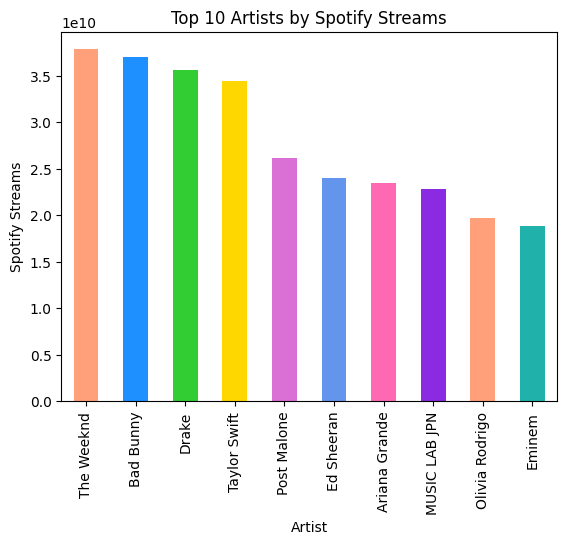

In [7]:
top_artists = df.groupby('Artist')['Spotify Streams'].sum().nlargest(10)
colors = ['#FFA07A', '#1E90FF', '#32CD32', '#FFD700', '#DA70D6', 
          '#6495ED', '#FF69B4', '#8A2BE2', '#FFA07A', '#20B2AA']
top_artists.plot(kind='bar',color=colors)
plt.title('Top 10 Artists by Spotify Streams')
plt.ylabel('Spotify Streams')
plt.show()



### 3.Which artists have the highest average track score?

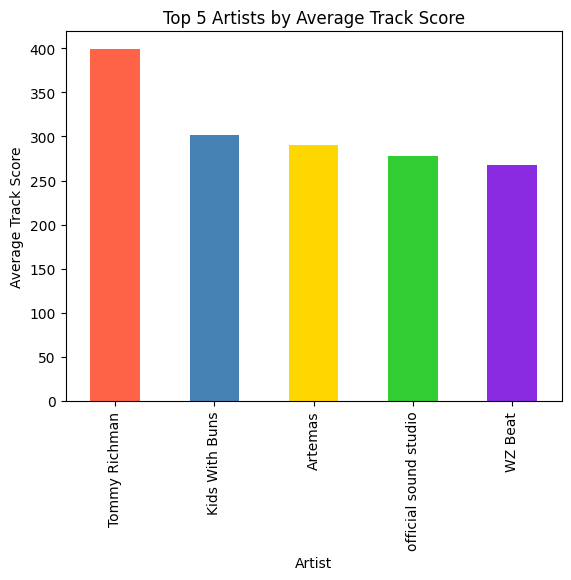

In [8]:
top_artists_avg_score = df.groupby('Artist')['Track Score'].mean().nlargest(5)
colors = ['#FF6347', '#4682B4', '#FFD700', '#32CD32', '#8A2BE2']
top_artists_avg_score.plot(kind='bar',color=colors)
plt.title('Top 5 Artists by Average Track Score')
plt.ylabel('Average Track Score')
plt.show()

### 4.Which platforms have highest streams/views?

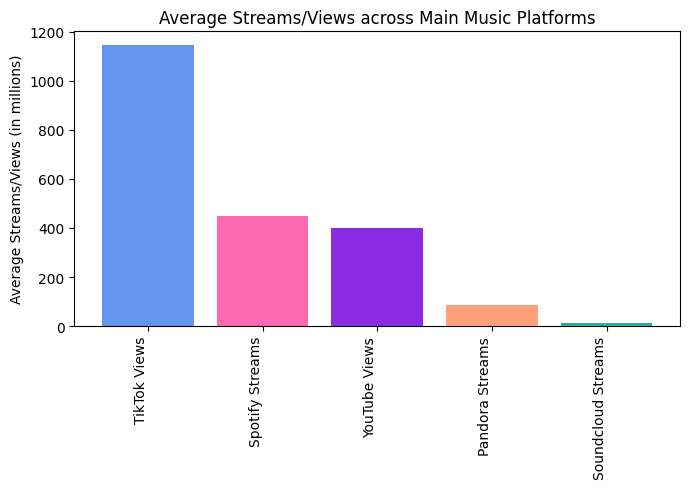

In [9]:

platforms = ['Spotify Streams', 'YouTube Views', 'TikTok Views', 'Pandora Streams', 'Soundcloud Streams']

df_cleaned = df[platforms].dropna(axis=0)

platform_means = df_cleaned.mean(axis=0) / 1_000_000

platform_means_sorted = platform_means.sort_values(ascending=False)

plt.figure(figsize=(7, 5))
x=['#6495ED', '#FF69B4', '#8A2BE2', '#FFA07A', '#20B2AA']
plt.bar(platform_means_sorted.index, platform_means_sorted.values, color=x)
plt.title('Average Streams/Views across Main Music Platforms')
plt.ylabel('Average Streams/Views (in millions)')
plt.xticks(rotation=90, ha='right')

plt.tight_layout()
plt.show()



### 5.plot the AirPlay Spins for the top 10 tracks with the most trackscore?

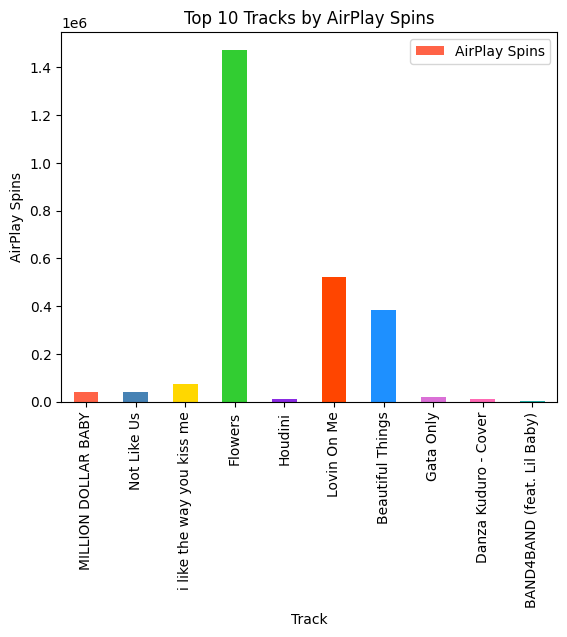

In [10]:
top_tracks_airplay = df.nlargest(10, 'Track Score')
colors = ['#FF6347', '#4682B4', '#FFD700', '#32CD32', '#8A2BE2', 
          '#FF4500', '#1E90FF', '#DA70D6', '#FF69B4', '#20B2AA']
top_tracks_airplay.plot(kind='bar', x='Track', y='AirPlay Spins',color=colors)
plt.title('Top 10 Tracks by AirPlay Spins')
plt.ylabel('AirPlay Spins')
plt.show()



### 6.How does Shazam count vary between explicit and non-explicit tracks?

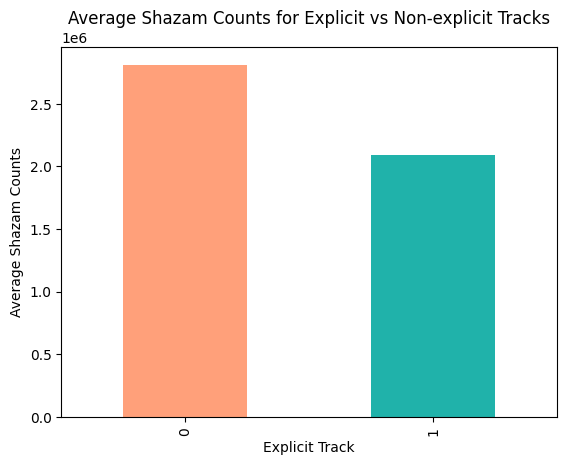

In [11]:
avg_shazam_counts = df.groupby('Explicit Track')['Shazam Counts'].mean()
a=['#FFA07A', '#20B2AA']
avg_shazam_counts.plot(kind='bar',color=a)
plt.title('Average Shazam Counts for Explicit vs Non-explicit Tracks')
plt.ylabel('Average Shazam Counts')
plt.show()

### 7. How does SoundCloud streams compare with Pandora streams for top 10 all time rank tracks?

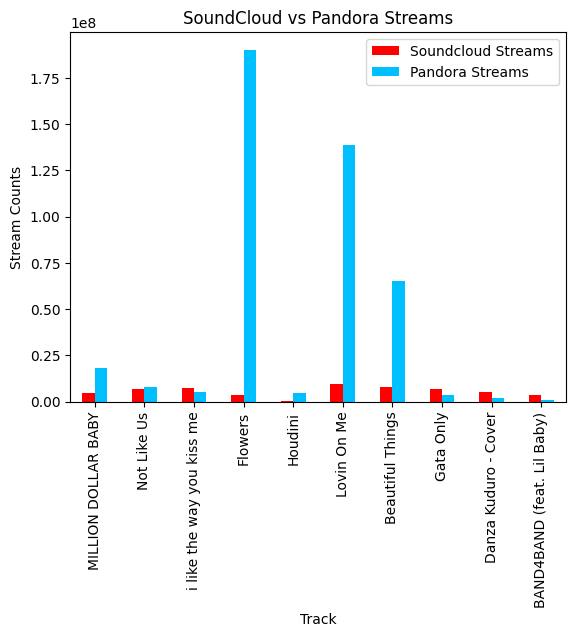

In [12]:
df['All Time Rank'] = df['All Time Rank'].replace(',', '', regex=True).astype(float)
top_soundcloud = df.nsmallest(10, 'All Time Rank')
colors = ['red', '#00BFFF']
top_soundcloud.plot(kind='bar', x='Track', y=['Soundcloud Streams', 'Pandora Streams'],color=colors)
plt.title('SoundCloud vs Pandora Streams')
plt.ylabel('Stream Counts')
plt.show()

### 8.What is the relationship between Spotify streams and YouTube views?

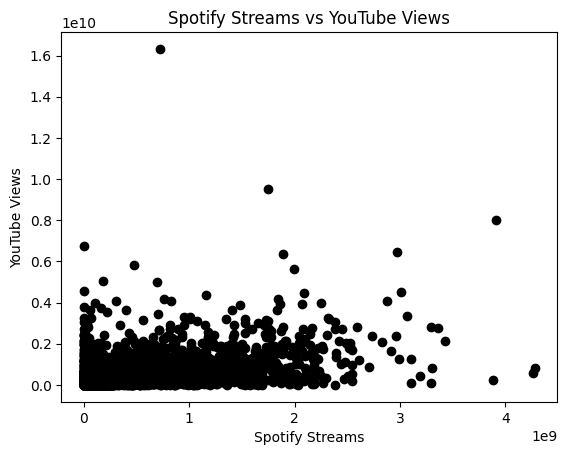

In [13]:
plt.scatter(df['Spotify Streams'], df['YouTube Views'],color='black')
plt.title('Spotify Streams vs YouTube Views')
plt.xlabel('Spotify Streams')
plt.ylabel('YouTube Views')
plt.show()

### 9.What is the trend of track scores over the years?

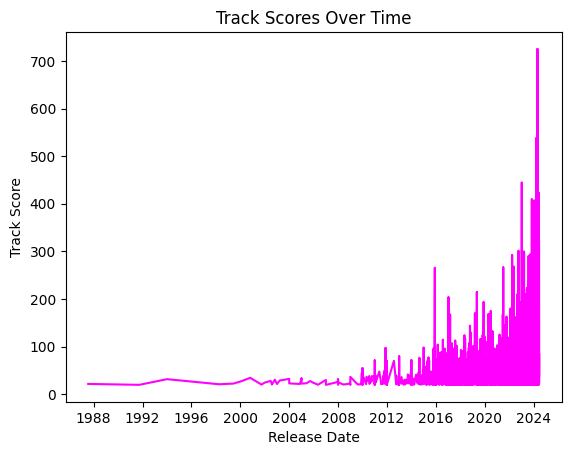

In [14]:
df['Release Date'] = pd.to_datetime(df['Release Date'])
df_sorted = df.sort_values(by='Release Date')
plt.plot(df_sorted['Release Date'], df_sorted['Track Score'],color='#FF00FF')
plt.title('Track Scores Over Time')
plt.xlabel('Release Date')
plt.ylabel('Track Score')
plt.show()


### 10.What is the average track score across different years of release?

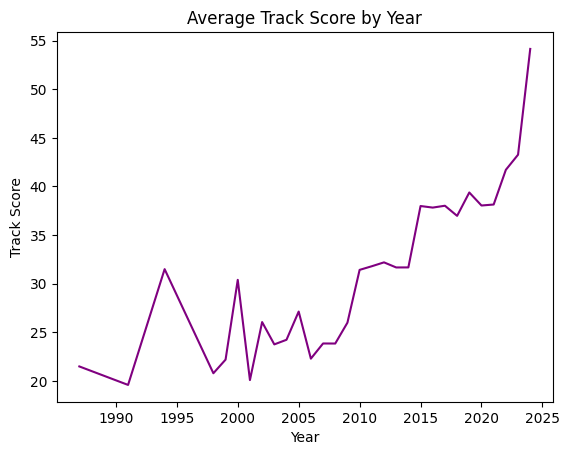

In [15]:
df['Year'] = df['Release Date'].dt.year
avg_score_by_year = df.groupby('Year')['Track Score'].mean()
avg_score_by_year.plot(kind='line',color='#800080')
plt.title('Average Track Score by Year')
plt.ylabel('Track Score')
plt.show()


### 11.How do SoundCloud streams vary between different years of release?

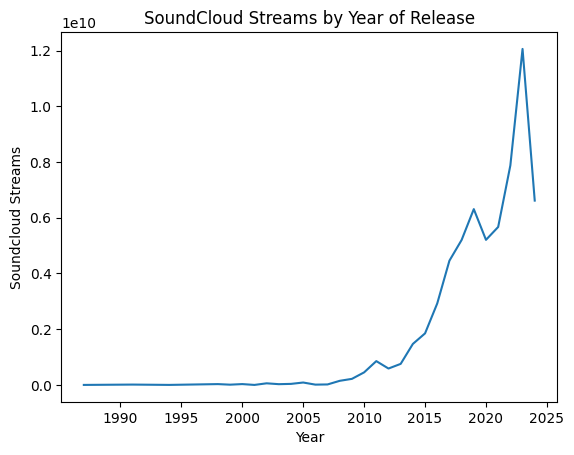

In [16]:
df['Year'] = df['Release Date'].dt.year
streams_by_year = df.groupby('Year')['Soundcloud Streams'].sum()
streams_by_year.plot(kind='line')
plt.title('SoundCloud Streams by Year of Release')
plt.ylabel('Soundcloud Streams')
plt.show()


### 12.Which year had the most tracks with TikTok posts?

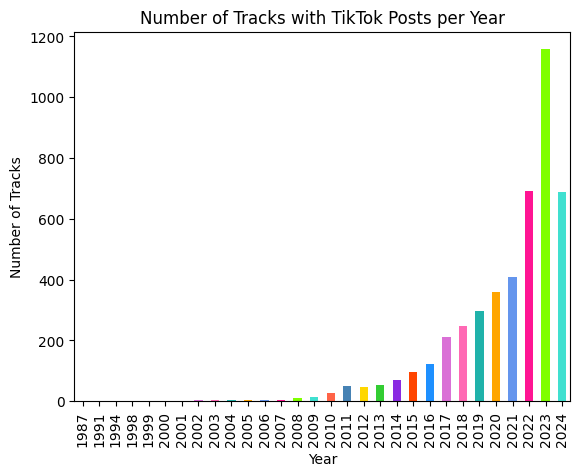

In [17]:
df['Release Year'] = df['Release Date'].dt.year
tiktok_tracks_per_year = df[df['TikTok Posts'] > 0].groupby('Release Year').size()
colors = ['#FF6347', '#4682B4', '#FFD700', '#32CD32', '#8A2BE2', 
          '#FF4500', '#1E90FF', '#DA70D6', '#FF69B4', '#20B2AA', 
          '#FFA500', '#6495ED', '#FF1493', '#7FFF00', '#40E0D0']
tiktok_tracks_per_year.plot(kind='bar',color=colors)
plt.title('Number of Tracks with TikTok Posts per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.show()






### 13.Which quarter of the year have the most track releases?

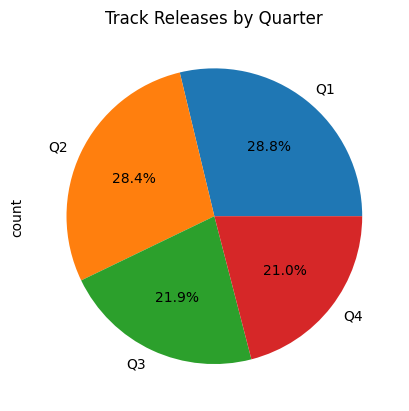

In [18]:
df['Release Quarter'] = df['Release Date'].dt.quarter
quarter_counts = df['Release Quarter'].value_counts()
quarter_counts.plot(kind='pie', autopct='%1.1f%%', labels=['Q1', 'Q2', 'Q3', 'Q4'])
plt.title('Track Releases by Quarter')
plt.show()
